<a href="https://colab.research.google.com/github/seungyeoniii/neuroimaging/blob/main/LRP_view_plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
sys.version

'3.7.12 (default, Sep 10 2021, 00:21:48) \n[GCC 7.5.0]'

In [ ]:
import torch

print(torch.__version__)

import torchvision

print(torchvision.__version__)

1.10.0+cu111
0.11.1+cu111


In [ ]:
# !rm -r '/content/lrp_resize_padding_whole'
# !rm -r '/content/lrp_resize_padding_white_csf'
# !rm -r '/content/lrp_resize_padding_white'
# !rm -r '/content/lrp_resize_padding_grey_white'
# !rm -r '/content/lrp_resize_padding_grey_csf'
# !rm -r '/content/lrp_resize_padding_grey'
# !rm -r '/content/lrp_resize_padding_csf'

# !rm -r '/content/lrp_resize_padding_csf_nii'
# !rm -r '/content/csf_LRP_VIEW'

!rm -r '/content/lrp_resize_padding_grey_csf_nii'
!rm -r '/content/grey_csf_LRP_VIEW'

# !rm -r '/content/lrp_resize_padding_grey_nii'
# !rm -r '/content/grey_LRP_VIEW'

# !rm -r '/content/lrp_resize_padding_white_csf_nii'
# !rm -r '/content/white_csf_LRP_VIEW'

# !rm -r '/content/lrp_resize_padding_white_nii'
# !rm -r '/content/white_LRP_VIEW'

!rm -r '/content/lrp_resize_padding_grey_white_nii'
!rm -r '/content/grey_white_LRP_VIEW'

# !rm -r '/content/lrp_resize_padding_whole_nii'
# !rm -r '/content/whole_LRP_VIEW'

In [ ]:
!pip install nilearn

     |████████████████████████████████| 10.0 MB 4.4 MB/s 


In [ ]:
from nilearn import datasets, plotting
from nibabel.testing import data_path
import nibabel as nib

import os

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

/usr/local/lib/python3.7/dist-packages/nilearn/datasets/__init__.py:96: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


(91, 109, 91)
(79, 95, 68)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


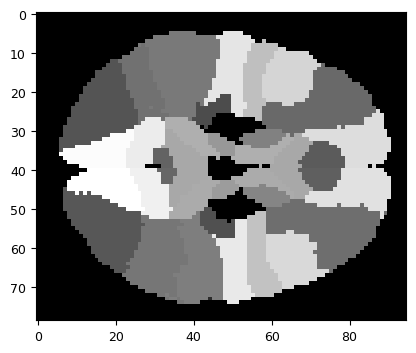

In [ ]:
whole_mask = nib.load('/content/Hammers_mith_atlas_n30r83_SPM5_2mm.nii')
whole_mask = np.array(whole_mask.get_data())  
print(whole_mask.shape)
# grey_mask = np.rot90(grey_mask, k=1, axes=(0, 1))  # (H, W, D)
# print(grey_mask.shape)

whole_mask = np.rot90(whole_mask, k=1, axes=(0, 1))  # (H, W, D)
whole_mask = np.array(whole_mask[7:102, 6:85, 11:79]).astype(np.float32)    # bounding box
whole_mask = np.rot90(whole_mask, k=-1)  # (H, W, D)
plt.imshow(whole_mask[:,:,34], cmap='gist_gray')
print(whole_mask.shape)


In [ ]:
standard_temp = nib.load('/content/FBB_BRAIN_ST_ANONYMIZED_190502134706_ID0021.nii')
print(standard_temp.shape)

(79, 95, 68)


In [ ]:
hammers_aff_changed = nib.Nifti1Image(whole_mask, standard_temp.affine)

In [ ]:
nib.save(hammers_aff_changed, 'hammers_aff_changed.nii')

In [ ]:
mni_template = nib.load('mni_template.nii')
mni = np.array(mni_template.get_data())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


# MNI template GM masking(WM 제외)
1. grey matter nifti를 불러와서.
2. affine을 mni_template.nii에 맞춥니다.
3. affine을 맞춘 grey matter nifti를 저장하고.
4. mni template에 마스킹합니다.
5. GM으로 마스킹 된 mni template를 저장합니다.

(99, 117, 95)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


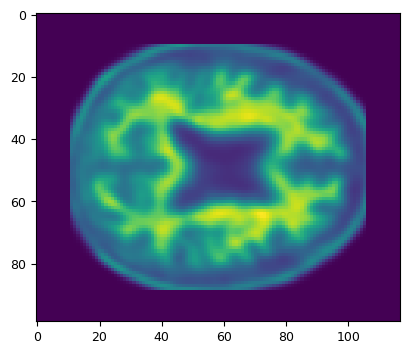

In [ ]:
gm = nib.load('/content/FBB_BRAIN_ST_ANONYMIZED_190502134706_ID0021.nii')
gm = np.array(gm.get_data())
gm = np.pad(gm, ((10,10),(11,11),(13,14)), 'constant', constant_values=0)
print(gm.shape)
npy_flatten = gm.flatten().reshape(-1,1)
scaler = MinMaxScaler((0,255))
scaler.fit(npy_flatten)
X_new = scaler.transform(npy_flatten)
gm = X_new.reshape(gm.shape)
plt.imshow(gm[:,:,47]) #
plt.show()

In [ ]:
# gm[gm>=0.05] = 1.0
# gm[gm<0.05]=0.0

In [ ]:
gm_test = nib.Nifti1Image(gm, mni_template.affine)

In [ ]:
gm_vmax = np.percentile(gm, 99.9)

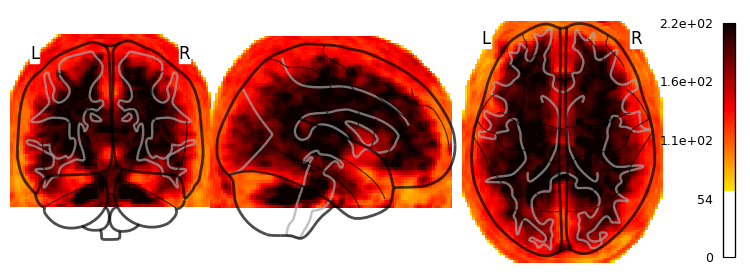

In [ ]:
plotting.plot_glass_brain(gm_test, threshold=gm_vmax*0.3, vmax=gm_vmax, draw_cross=False, colorbar=True)

(99, 117, 95)


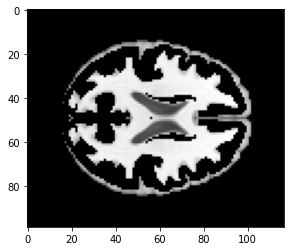

In [ ]:
mni_masked = gm * mni
print(mni_masked.shape)
plt.imshow(mni_masked[:,:,47],cmap='gist_gray') #
plt.show()

In [ ]:
mni_gmm = nib.Nifti1Image(mni_masked, mni_template.affine)
nib.save(mni_gmm, 'white_csf_mni.nii.gz')

NameError: ignored

In [ ]:
grey = np.load('/content/grey.npy')
print(grey.shape)

(79, 95, 68)


min,max 0.0 128.0 vmin, vmax 76.0 114.0
(79, 95, 68)
(99, 117, 95)


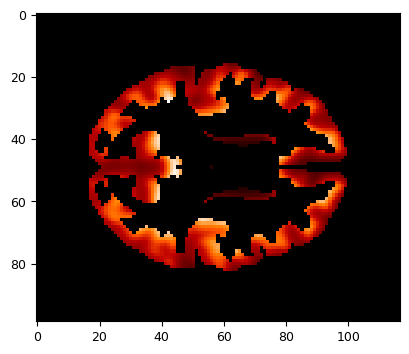

In [ ]:
true_brain = np.load('/content/FBB_BRAIN_ST_ANONYMIZED_190502134706_ID0113_npyonly.npy') # /content/FBB_BRAIN_ST_ANONYMIZED_190502134706_ID0169_lrp_resize.npy
true_brain = true_brain.astype(np.float64)
# true_brain = true_brain*grey
vmax = np.percentile(true_brain,99.9)
vmin = np.percentile(true_brain, 90)
print("min,max",true_brain.min(),true_brain.max(), "vmin, vmax", vmin, vmax)
# true_brain[(true_brain<vmin)]=0
true_brain = np.transpose(true_brain, (2,1,0))
true_brain = np.rot90(true_brain, 2)
true_brain = true_brain*grey
print(true_brain.shape)

true_brain = np.pad(true_brain, ((10,10),(11,11),(13,14)), 'constant', constant_values=0)
print(true_brain.shape)

plt.imshow(true_brain[:,:,47],cmap='gist_heat')

(99, 117, 95)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


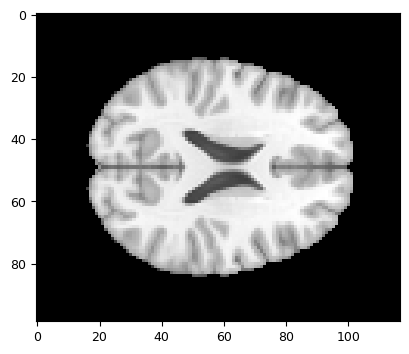

In [ ]:
mni_template = nib.load('mni_template.nii')
mni_template_npy = np.array(mni_template.get_data())
print(mni_template_npy.shape)
plt.imshow(mni_template_npy[:,:,47], cmap='gist_gray')

In [ ]:
# ad_vmax = 0.0001454706650838524 # np.percentile(true_brain, 99.9)
ad_vmax = 7.723581857135304e-05 # 99.5
print(ad_vmax)

7.723581857135304e-05


In [ ]:
true_brain_nii = nib.Nifti1Image(true_brain, mni_template.affine)
# nib.save(true_brain_nii, 'test.nii')

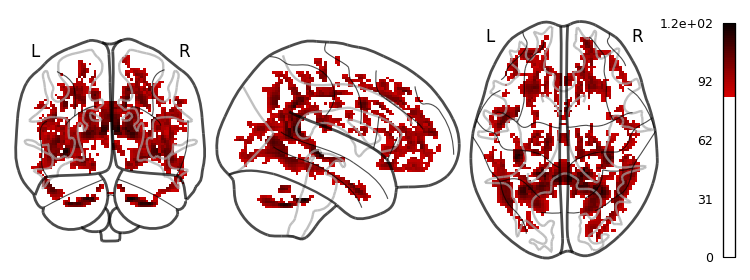

In [ ]:
plotting.plot_glass_brain(true_brain_nii, vmax=true_pos_barin.max(), threshold=true_pos_brain.max()*0.75, draw_cross=False, colorbar=True)

min,max 0.0 123.0 vmin, vmax 18.0 99.0
(79, 95, 68)
(99, 117, 95)


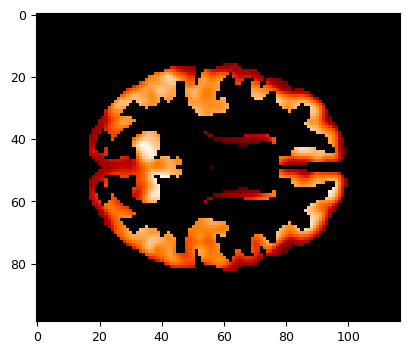

In [ ]:

true_pos_brain = np.load('/content/FBB_BRAIN_ST_ANONYMIZED_190502134706_ID0169_npyonly.npy') # /content/FBB_BRAIN_ST_ANONYMIZED_190502134706_ID0169_lrp_resize.npy
true_pos_brain = true_pos_brain.astype(np.float64)
vmax = np.percentile(true_brain,99.9)
vmin = np.percentile(true_brain, 90)
print("min,max",true_brain.min(),true_brain.max(), "vmin, vmax", vmin, vmax)
true_pos_brain = np.transpose(true_pos_brain, (2,1,0))
true_pos_brain = np.rot90(true_pos_brain, 2)
true_pos_brain = true_pos_brain*grey
print(true_pos_brain.shape)

true_pos_brain = np.pad(true_pos_brain, ((10,10),(11,11),(13,14)), 'constant', constant_values=0)
print(true_pos_brain.shape)

plt.imshow(true_pos_brain[:,:,47],cmap='gist_heat')

In [ ]:
true_pos_brain_nii = nib.Nifti1Image(true_pos_brain, mni_template.affine)

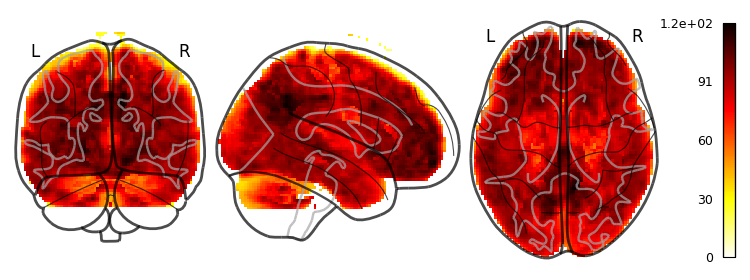

In [ ]:
plotting.plot_glass_brain(true_pos_brain_nii,vmax=true_pos_brain.max(), threshold=true_pos_brain.max()*0.75, draw_cross=False, colorbar=True)

In [ ]:
nib.save(true_pos_brain_nii, '/content/positive_brain.nii.gz')

In [ ]:
from nilearn import datasets
motor_images = datasets.fetch_neurovault_motor_task()


Dataset created in /root/nilearn_data/neurovault



In [ ]:
!unzip -uq '/content/lrp_resize_padding_whole.zip' -d '/content/lrp_resize_padding_whole'
# !unzip -uq '/content/lrp_resize_padding_white_csf.zip' -d '/content/lrp_resize_padding_white_csf'
# !unzip -uq '/content/lrp_resize_padding_white.zip' -d '/content/lrp_resize_padding_white'
# !unzip -uq '/content/lrp_resize_padding_grey_white.zip' -d '/content/lrp_resize_padding_grey_white'
# !unzip -uq '/content/lrp_resize_padding_grey_csf.zip' -d '/content/lrp_resize_padding_grey_csf'
# !unzip -uq '/content/lrp_resize_padding_grey.zip' -d '/content/lrp_resize_padding_grey'
# !unzip -uq '/content/lrp_resize_padding_csf.zip' -d '/content/lrp_resize_padding_csf'

# LOAD, and CHANGE NUMPY to NiFTI

In [ ]:
directory = '/content/lrp_resize_padding_whole'
nii_directory = '/content/lrp_resize_padding_whole_nii'

# directory = '/content/lrp_resize_padding_white_csf'
# nii_directory = '/content/lrp_resize_padding_white_csf_nii'

# directory = '/content/lrp_resize_padding_white'
# nii_directory = '/content/lrp_resize_padding_white_nii'

# directory = '/content/lrp_resize_padding_grey_white'
# nii_directory = '/content/lrp_resize_padding_grey_white_nii'

# directory = '/content/lrp_resize_padding_grey_csf'
# nii_directory = '/content/lrp_resize_padding_grey_csf_nii'

# directory = '/content/lrp_resize_padding_grey'
# nii_directory = '/content/lrp_resize_padding_grey_nii'

# directory = '/content/lrp_resize_padding_csf'
# nii_directory = '/content/lrp_resize_padding_csf_nii'

In [ ]:
# mni_template = nib.load('csf_mni.nii.gz')
# mni_template = nib.load('grey_csf_mni.nii.gz')
# mni_template = nib.load('grey_mni.nii.gz')
# mni_template = nib.load('white_csf_mni.nii.gz')
# mni_template = nib.load('white_mni.nii.gz')
# mni_template = nib.load('grey_white_mni.nii.gz')
mni_template = nib.load('wo_scalp_mni.nii.gz')

In [ ]:
if not os.path.exists(nii_directory):
    os.makedirs(nii_directory)

dir_list = os.listdir(directory)
full_paths = [os.path.join(directory, dir) for dir in dir_list]
dauh_test_list = []
# label = os.path.basename(fold)
for path in full_paths:    
    # print(path)
    dauh_test = np.load(path) # (95, 117, 99)
    dauh_test = np.transpose(dauh_test, axes=(2,1,0))
    dauh_test = np.rot90(dauh_test, 2) # (95, 117, 99) >> (99, 117, 95)
    
    dauh_test_flatten = dauh_test.flatten().reshape(-1,1)
    scaler = MinMaxScaler((0,255))
    scaler.fit(dauh_test_flatten)
    X_new = scaler.transform(dauh_test_flatten)
    # print(X_new.min(), X_new.max())
    dauh_test = X_new.reshape(dauh_test.shape)
    # print(dauh_test.shape)
    # label_list.append(label)
    dauh_test_list.append(dauh_test)
    dauh_nifti = nib.Nifti1Image(dauh_test, mni_template.affine)
    fname = os.path.basename(path)
    nib.save(dauh_nifti, os.path.join(nii_directory, fname[:-4]+'.nii.gz'))

dauh_test_list = np.array(dauh_test_list)

In [ ]:
# folder 안에 grouping되어있는 경우
directory = '/content/lrp_resize_padding_csf'
nii_directory = '/content/RESIZE_CORTEX_PADDING_nii'
dir_list = os.listdir(directory)
folds = [os.path.join(directory, dir) for dir in dir_list]
print(folds)
label_list = []
dauh_test_list = []
for fold in folds:
    if folds == os.path.join(directory, '.ipynb_checkpoints'):
        continue
    else:
        label = os.path.basename(fold)
        nii_list = os.listdir(fold)
        full_paths = [os.path.join(fold, nii) for nii in nii_list]
        for path in full_paths:    
            # print(path)
            dauh_test = np.load(path) # (95, 117, 99)
            dauh_test = np.transpose(dauh_test, axes=(2,1,0))
            dauh_test = np.rot90(dauh_test, 2) # (95, 117, 99) >> (99, 117, 95)
            
            dauh_test_flatten = dauh_test.flatten().reshape(-1,1)
            scaler = MinMaxScaler((0,255))
            scaler.fit(dauh_test_flatten)
            X_new = scaler.transform(dauh_test_flatten)
            # print(X_new.min(), X_new.max())
            dauh_test = X_new.reshape(dauh_test.shape)
            # print(dauh_test.shape)
            label_list.append(label)
            dauh_test_list.append(dauh_test)
            dauh_nifti = nib.Nifti1Image(dauh_test, mni_template.affine)
            fname = os.path.basename(path)
            nib.save(dauh_nifti, os.path.join(nii_directory, label, fname[:-4]+'.nii.gz'))

dauh_test_list = np.array(dauh_test_list)

['/content/lrp_resize_padding_csf/FBB_BRAIN_ST_ANONYMIZED_190502134706_ID0100_lrp_resize.npy', '/content/lrp_resize_padding_csf/FBB_BRAIN_ST_ANONYMIZED_200131203130_NII_ID0035_lrp_resize.npy', '/content/lrp_resize_padding_csf/FBB_BRAIN_ST_ANONYMIZED_200801154530_NII_ID0004_lrp_resize.npy', '/content/lrp_resize_padding_csf/FBB_BRAIN_ST_ANONYMIZED_190502134706_ID0247_lrp_resize.npy', '/content/lrp_resize_padding_csf/FBB_BRAIN_ST_ANONYMIZED_190502134706_ID0321_lrp_resize.npy', '/content/lrp_resize_padding_csf/FBB_BRAIN_ST_ANONYMIZED_190502134706_ID0187_lrp_resize.npy', '/content/lrp_resize_padding_csf/FBB_BRAIN_ST_ANONYMIZED_200131203130_NII_ID0026_lrp_resize.npy', '/content/lrp_resize_padding_csf/FBB_BRAIN_ST_ANONYMIZED_190502134706_ID0050_lrp_resize.npy', '/content/lrp_resize_padding_csf/FBB_BRAIN_ST_ANONYMIZED_200131203130_NII_ID0036_lrp_resize.npy', '/content/lrp_resize_padding_csf/FBB_BRAIN_ST_ANONYMIZED_190502134706_ID0068_lrp_resize.npy', '/content/lrp_resize_padding_csf/FBB_BRAIN_

NotADirectoryError: ignored

In [ ]:
vmax=np.percentile(dauh_test_list, 99.9)
print(vmax)

58.63418060608804


In [ ]:
mni_template.affine

array([[   2.,    0.,    0.,  -98.],
       [   0.,    2.,    0., -134.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])

# LRP MAP

In [ ]:
# !rm -r /content/grey_LRP_VIEW

In [ ]:
# !unzip -uq '/content/lrp_resize_padding_whole_nii.zip' -d '/content/lrp_resize_padding_whole_nii'
# !unzip -uq '/content/lrp_resize_padding_white_csf_nii.zip' -d '/content/lrp_resize_padding_white_csf_nii'
# !unzip -uq '/content/lrp_resize_padding_white_nii.zip' -d '/content/lrp_resize_padding_white_nii'
# !unzip -uq '/content/lrp_resize_padding_grey_white_nii.zip' -d '/content/lrp_resize_padding_grey_white_nii'
# !unzip -uq '/content/lrp_resize_padding_grey_csf_nii.zip' -d '/content/lrp_resize_padding_grey_csf_nii'
# !unzip -uq '/content/lrp_resize_padding_grey_nii.zip' -d '/content/lrp_resize_padding_grey_nii'
# !unzip -uq '/content/lrp_resize_padding_csf_nii.zip' -d '/content/lrp_resize_padding_csf_nii'

In [ ]:
# nii_directory = '/content/lrp_resize_padding_csf_nii'
# lrp_view_directory = '/content/csf_LRP_VIEW'

# nii_directory = '/content/lrp_resize_padding_grey_nii'
# lrp_view_directory = '/content/grey_LRP_VIEW'

# nii_directory = '/content/lrp_resize_padding_grey_csf_nii'
# lrp_view_directory = '/content/grey_csf_LRP_VIEW'

# nii_directory = '/content/lrp_resize_padding_white_csf_nii'
# lrp_view_directory = '/content/white_csf_LRP_VIEW'

# nii_directory = '/content/lrp_resize_padding_white_nii'
# lrp_view_directory = '/content/white_LRP_VIEW'

# nii_directory = '/content/lrp_resize_padding_grey_white_nii'
# lrp_view_directory = '/content/grey_white_LRP_VIEW'

nii_directory = '/content/lrp_resize_padding_whole_nii'
lrp_view_directory = '/content/whole_LRP_VIEW'


In [ ]:
if not os.path.exists(lrp_view_directory):
    os.makedirs(lrp_view_directory)
dir_list = os.listdir(nii_directory)
full_paths = [os.path.join(nii_directory, dir) for dir in dir_list]
dauh_test_list = []
for path in full_paths:
    _data = nib.load(path)
    _data = np.array(_data.get_data())
    dauh_test_list.append(_data)

dauh_test_list = np.array(dauh_test_list)
vmax=np.percentile(dauh_test_list, 99.9)
print(vmax)

for path in full_paths:
    if path == os.path.join(nii_directory, '.ipynb_checkpoints'):
        continue
    else:
        fname = os.path.basename(path)
        output_file= os.path.join(lrp_view_directory, fname[:-7]+'.png')
        title= fname[26:-7]
        # print(title)
        plotting.plot_stat_map(path, mni_template, output_file = output_file, threshold=vmax*0.1, vmax=vmax, draw_cross=False, cut_coords=(15,-17,-6))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


72.57847749706904


In [ ]:
# folder 내 그루핑 되어있는 것.
nii_directory = '/content/RESIZE_CORTEX_PADDING_nii'
lrp_view_directory = '/content/RESIZE_CORTEX_PADDING_LRP_VIEW'
dir_list = os.listdir(nii_directory)
folds = [os.path.join(nii_directory, dir) for dir in dir_list]
print(folds)
label_list = []
dauh_test_list = []
for fold in folds:
    if folds == os.path.join(nii_directory, '.ipynb_checkpoints'):
        continue
    else:
        label = os.path.basename(fold)
        nii_list = os.listdir(fold)
        full_paths = [os.path.join(fold, nii) for nii in nii_list]
        for path in full_paths:
            if path == os.path.join(nii_directory, label, '.ipynb_checkpoints'):
                continue
            else:
                fname = os.path.basename(path)
                output_file= os.path.join(lrp_view_directory, label, fname[:-7]+'.png')
                title= fname[26:-7]
                # print(title)
                plotting.plot_stat_map(path, mni_template, output_file = output_file, threshold=vmax*0.1, vmax=vmax, draw_cross=False, cut_coords=(15,-17,-6))

['/content/RESIZE_CORTEX_PADDING_nii/TN', '/content/RESIZE_CORTEX_PADDING_nii/TP', '/content/RESIZE_CORTEX_PADDING_nii/FP', '/content/RESIZE_CORTEX_PADDING_nii/FN', '/content/RESIZE_CORTEX_PADDING_nii/.ipynb_checkpoints']


In [ ]:
# !zip -r /content/csf_LRP_VIEW.zip /content/csf_LRP_VIEW/
# !zip -r /content/lrp_resize_padding_csf_nii.zip /content/lrp_resize_padding_csf_nii

# !zip -r /content/grey_LRP_VIEW.zip /content/grey_LRP_VIEW/
# !zip -r /content/lrp_resize_padding_grey_nii.zip /content/lrp_resize_padding_grey_nii

# !zip -r /content/grey_csf_LRP_VIEW.zip /content/grey_csf_LRP_VIEW/
# !zip -r /content/lrp_resize_padding_grey_csf_nii.zip /content/lrp_resize_padding_grey_csf_nii

# !zip -r /content/white_csf_LRP_VIEW.zip /content/white_csf_LRP_VIEW/
# !zip -r /content/lrp_resize_padding_white_csf_nii.zip /content/lrp_resize_padding_white_csf_nii

# !zip -r /content/white_LRP_VIEW.zip /content/white_LRP_VIEW/
# !zip -r /content/lrp_resize_padding_white_nii.zip /content/lrp_resize_padding_white_nii/

# !zip -r /content/grey_white_LRP_VIEW.zip /content/grey_white_LRP_VIEW/
# !zip -r /content/lrp_resize_padding_grey_white_nii.zip /content/lrp_resize_padding_grey_white_nii

!zip -r /content/whole_LRP_VIEW.zip /content/whole_LRP_VIEW/
!zip -r /content/lrp_resize_padding_whole_nii.zip /content/lrp_resize_padding_whole_nii/

  adding: content/whole_LRP_VIEW/ (stored 0%)
  adding: content/whole_LRP_VIEW/FBB_BRAIN_ST_ANONYMIZED_190502134706_ID0243_lrp_resize.png (deflated 1%)
  adding: content/whole_LRP_VIEW/FBB_BRAIN_ST_ANONYMIZED_200801154530_NII_ID0005_lrp_resize.png (deflated 2%)
  adding: content/whole_LRP_VIEW/FBB_BRAIN_ST_ANONYMIZED_200221151330_NII_ID0009_lrp_resize.png (deflated 1%)
  adding: content/whole_LRP_VIEW/FBB_BRAIN_ST_ANONYMIZED_200801154530_NII_ID0004_lrp_resize.png (deflated 1%)
  adding: content/whole_LRP_VIEW/FBB_BRAIN_ST_ANONYMIZED_190502134706_ID0003_lrp_resize.png (deflated 1%)
  adding: content/whole_LRP_VIEW/FBB_BRAIN_ST_ANONYMIZED_190502134706_ID0053_lrp_resize.png (deflated 1%)
  adding: content/whole_LRP_VIEW/FBB_BRAIN_ST_ANONYMIZED_190502134706_ID0104_lrp_resize.png (deflated 2%)
  adding: content/whole_LRP_VIEW/FBB_BRAIN_ST_ANONYMIZED_190502134706_ID0346_lrp_resize.png (deflated 1%)
  adding: content/whole_LRP_VIEW/FBB_BRAIN_ST_ANONYMIZED_190502134706_ID0001_lrp_resize.png (d

# lrp mean map

In [ ]:
# !unzip -uq '/content/mean_map_csf.zip' -d '/content/mean_map_csf'
# !unzip -uq '/content/mean_map_grey.zip' -d '/content/mean_map_grey'
# !unzip -uq '/content/mean_map_grey_csf.zip' -d '/content/mean_map_grey_csf'
# !unzip -uq '/content/mean_map_grey_white.zip' -d '/content/mean_map_grey_white'
# !unzip -uq '/content/mean_map_white.zip' -d '/content/mean_map_white'
# !unzip -uq '/content/mean_map_white_csf.zip' -d '/content/mean_map_white_csf'
!unzip -uq '/content/mean_map_whole.zip' -d '/content/mean_map_whole'

In [ ]:
mean_maps = ['mean_map_csf', 'mean_map_grey', 'mean_map_grey_csf', 'mean_map_grey_white', 'mean_map_white', 'mean_map_white_csf', 'mean_map_whole']
fnames = ['lrp_mean_FN_map.npy', 'lrp_mean_FP_map.npy', 'lrp_mean_TN_map.npy', 'lrp_mean_TP_map.npy']
# dauh_test = np.load('/content/mean_TN/lrp_mean_TN_map_resize_padding.npy') # 0
# # dauh_test = np.load('/content/mean_TP/lrp_mean_TP_map_resize_padding.npy') # 1

# print(dauh_test.shape)
# dauh_test = np.transpose(dauh_test, axes=(2,1,0))
# dauh_test = np.rot90(dauh_test, 2)
# print(dauh_test.shape)

In [ ]:
glassview_dir = '/content/glassview_mean_map_'
regions = ['csf', 'grey', 'grey_csf', 'grey_white', 'white', 'white_csf', 'whole']
for r in regions:
    if not os.path.isdir(os.path.join(glassview_dir+r)):
        os.makedirs(os.path.join(glassview_dir+r))

In [ ]:
templates = ['csf_mni.nii.gz','grey_mni.nii.gz','grey_csf_mni.nii.gz','grey_white_mni.nii.gz','white_mni.nii.gz','white_csf_mni.nii.gz','wo_scalp_mni.nii.gz']

In [ ]:
mmap_npy_dir = '/content/mean_map_'

for idx1, r in enumerate(regions):
    mni_template = nib.load(templates[idx1])
    mmap_npy_path = os.path.join(mmap_npy_dir+r)
    glassview_path = os.path.join(glassview_dir+r)
    npy_list = []
    for f in fnames:
        full_path = os.path.join(mmap_npy_path,f)
        # print(save_path)
        npy = np.load(full_path)
        npy = np.transpose(npy, axes=(2,1,0))
        npy = np.rot90(npy, k=2)
        npy_flatten = npy.flatten().reshape(-1,1)
        scaler = MinMaxScaler((0,255))
        scaler.fit(npy_flatten)
        X_new = scaler.transform(npy_flatten)
        # print(X_new.min(), X_new.max())
        npy = X_new.reshape(npy.shape)
        npy_list.append(npy)

        # print(npy.shape) # (99, 117, 95) 왼쪽이 뒷통수
        # plt.imshow(npy[:,:,47],cmap='gist_heat')
        # plt.show())
    npy_list = np.array(npy_list)
    vmax = np.percentile(npy, 99.9)
    print(r, 'vmax:', vmax)

    for idx2, f in enumerate(fnames):
        save_path = os.path.join(glassview_path,f[:-8]+'_glassview.png')
        mean_map = nib.Nifti1Image(npy_list[idx2], mni_template.affine)
        plotting.plot_stat_map(mean_map, mni_template, output_file = save_path, threshold=vmax*0.5, vmax=vmax, draw_cross=False, cut_coords=(15,-17,-6))
        # plotting.plot_glass_brain(mean_map, threshold=vmax*0.3, vmax=vmax, draw_cross=False, cmap='YlOrRd', colorbar=True)

csf vmax: 87.81568896979475
grey vmax: 124.33333021712605
grey_csf vmax: 40.32351986982341
grey_white vmax: 110.70859969604231
white vmax: 52.38676563171555
white_csf vmax: 78.57790781234269
whole vmax: 98.5192256052534


In [ ]:
plt.close()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
dauh_test_flatten = dauh_test.flatten().reshape(-1,1)
scaler = MinMaxScaler((0,255))
scaler.fit(dauh_test_flatten)
X_new = scaler.transform(dauh_test_flatten)
print(X_new.min(), X_new.max())
dauh_test = X_new.reshape(dauh_test.shape)
print(dauh_test.shape)

0.0 255.0
(99, 117, 95)


In [ ]:
#positive
vmax=np.percentile(dauh_test, 99.9)
print(vmax)

115.62879952599286


In [ ]:
dauh_nifti = nib.Nifti1Image(dauh_test, mni_template.affine)

In [ ]:
nib.save(dauh_nifti, '/content/lrp_mean_TN_map_resize_padding.nii.gz')
# nib.save(dauh_nifti, '/content/lrp_mean_TP_map_resize_padding.nii.gz')

In [ ]:
test_path = '/content/lrp_mean_TN_map_resize_padding.nii.gz'
# test_path = '/content/lrp_mean_TP_map_resize_padding.nii.gz'

In [ ]:
plotting.plot_stat_map(test_path, mni_template, output_file = 'lrp_mean_TN_map_resize_padding.png', threshold=vmax*0.1, vmax=vmax, draw_cross=False, title='lrp_mean_TN_map', cut_coords=[42,-27,-6])
# plotting.plot_glass_brain(stat_img, threshold=3)

In [ ]:
!zip -r /content/glassview_mean_map_csf.zip /content/glassview_mean_map_csf/
!zip -r /content/glassview_mean_map_grey.zip /content/glassview_mean_map_grey/
!zip -r /content/glassview_mean_map_grey_csf.zip /content/glassview_mean_map_grey_csf/
!zip -r /content/glassview_mean_map_grey_white.zip /content/glassview_mean_map_grey_white/
!zip -r /content/glassview_mean_map_white.zip /content/glassview_mean_map_white/
!zip -r /content/glassview_mean_map_white_csf.zip /content/glassview_mean_map_white_csf/
!zip -r /content/glassview_mean_map_whole.zip /content/glassview_mean_map_whole/

  adding: content/glassview_mean_map_csf/ (stored 0%)
  adding: content/glassview_mean_map_csf/lrp_mean_TN_glassview.png (deflated 4%)
  adding: content/glassview_mean_map_csf/lrp_mean_FP_glassview.png (deflated 3%)
  adding: content/glassview_mean_map_csf/lrp_mean_TP_glassview.png (deflated 4%)
  adding: content/glassview_mean_map_csf/lrp_mean_FN_glassview.png (deflated 3%)
  adding: content/glassview_mean_map_grey/ (stored 0%)
  adding: content/glassview_mean_map_grey/lrp_mean_TN_glassview.png (deflated 2%)
  adding: content/glassview_mean_map_grey/lrp_mean_FP_glassview.png (deflated 3%)
  adding: content/glassview_mean_map_grey/lrp_mean_TP_glassview.png (deflated 2%)
  adding: content/glassview_mean_map_grey/lrp_mean_FN_glassview.png (deflated 2%)
  adding: content/glassview_mean_map_grey_csf/ (stored 0%)
  adding: content/glassview_mean_map_grey_csf/lrp_mean_TN_glassview.png (deflated 2%)
  adding: content/glassview_mean_map_grey_csf/lrp_mean_FP_glassview.png (deflated 2%)
  adding

In [ ]:
mni_template = nib.load('/content/csf_mni.nii.gz') # nib.load('/content/mni_template.nii')  
mni = np.array(mni_template.get_data())
# csf_mask = np.load('/content/sccsf_WHD_7999568.npy')
# print(csf_mask.shape)
# plt.imshow(csf_mask[:,:,50], cmap='gist_gray')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


In [ ]:
mni.shape

(99, 117, 95)

(79, 95, 68)
(99, 117, 95)
(95, 117, 99)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


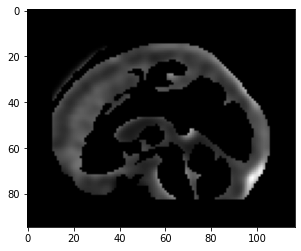

In [ ]:
test_nii = nib.load('/content/FBB_BRAIN_ST_ANONYMIZED_190502134706_ID0179.nii')
test = np.array(test_nii.get_data())
test = test*csf_mask
print(test.shape)
test = np.pad(test, ((10,10),(11,11),(12,15)), 'constant', constant_values=0)
print(test.shape)

test = np.transpose(test, (2,1,0))
test = np.rot90(test, 2)
print(test.shape)
plt.imshow(test[:,:,50], cmap='gist_gray')

In [ ]:
lrp_test = np.load('/content/FBB_BRAIN_ST_ANONYMIZED_190502134706_ID0179_lrp_resize.npy')

In [ ]:
lrp_test = np.transpose(lrp_test, (2,1,0))
lrp_test = np.rot90(lrp_test, 2)
print(lrp_test.shape)

(99, 117, 95)


(95, 117, 99)


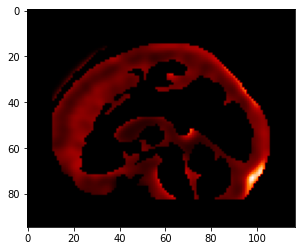

In [ ]:
lrp_test = np.transpose(test, (2,1,0))
lrp_test = np.rot90(test, 2)
print(lrp_test.shape)
plt.imshow(test[:,:,50],cmap='gist_heat')
plt.show()

In [ ]:
zero_map = np.zeros((99,117,95))
zero_map_nii = nib.Nifti1Image(zero_map, mni_template.affine)

In [ ]:
lrp_nii = nib.Nifti1Image(lrp_test, mni_template.affine)

/usr/local/lib/python3.7/dist-packages/nilearn/plotting/displays.py:880: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


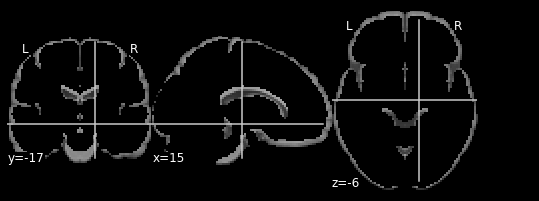

In [ ]:
plotting.plot_stat_map(zero_map_nii, mni_template, draw_cross=True, cut_coords=(15,-17,-6))

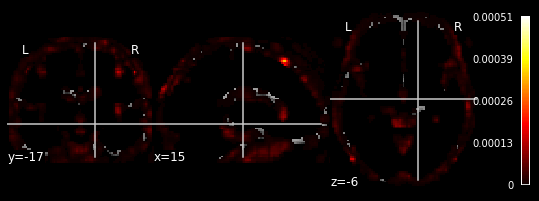

In [ ]:
plotting.plot_stat_map(lrp_nii, mni_template, draw_cross=True, cut_coords=(15,-17,-6))

# violin distribution

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


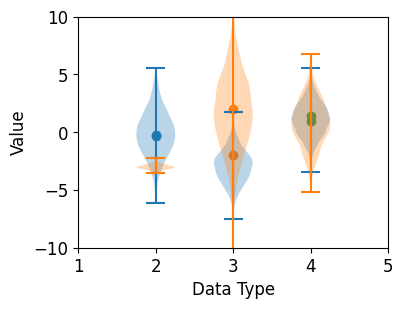

In [ ]:
plt.style.use('default')
plt.rcParams['figure.figsize']=(4,3)
plt.rcParams['font.size'] = 12

# np.random.seed(0)
# data_a = np.random.normal(0, 2.0, 1000)
# data_b = np.random.normal(-3.0, 1.5, 500)
# data_c = np.random.normal(1.2, 1.5, 1500)

# data_d = np.random.normal(-3.0, 0.2, 450)
# data_e = np.random.normal(1.7, 3.2, 1000)
# data_f = np.random.normal(0.8, 2.0, 700)
"""
1. dataframe
    clnc_diag temporal parietal frontal occipital parietal
p1     AD       0.09     0.02     0.3     0.1       0.13
p2     CN      0.004    0.0004   0.009   0.002     0.005
p3     CN      0.004    0.0004   0.009   0.002     0.005
.       .
.       .
.       .
pN     AD       0.09     0.02     0.3     0.1       0.13

2. AD / CN 분리
df['clnc_diag']가 'AD'인 것과 'CN'것을 분리한다.

x축: Temporal
     PostCing
     Frontal 
     Occipital
     Parietal
y축: 점점점점점(value)

3. violin plot에서
plot.violinplot([점점점1, 점점점2, 점점점3], position=[temporal, postcing, frontal, occipital, parietal])
"""
fig, ax = plt.subplots()
ax.scatter([2, 2], [-0.3,-0.25])
ax.scatter([3, 3], [2,-2])
ax.scatter([4, 4],[1,1.4])
violin = ax.violinplot([data_a, data_b, data_c], positions=[2,3,4])
violin = ax.violinplot([data_d, data_e, data_f], positions=[2,3,4])
ax.set_ylim(-10.0, 10.0)
ax.set_xticks([1,2,3,4,5])
ax.set_xlabel('Data Type')
ax.set_ylabel('Value')

plt.show()

# Violin plot, scatter

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
grey = pd.read_excel('/content/lrp_relevance_grey.xlsx', sheet_name='FN제외')
grey_all = pd.read_excel('/content/lrp_relevance_grey.xlsx', sheet_name='Sheet1')
# grey_csf = pd.read_excel('/content/lrp_relevance_grey_csf.xlsx')
# df_grey = pd.read_excel('/content/Total_results3-sum.xlsx', sheet_name='grey')
# df_grey_white = pd.read_excel('/content/Total_results3-sum.xlsx', sheet_name='grey_white')
# df_white_csf = pd.read_excel('/content/Total_results3-sum.xlsx', sheet_name='white')
# df_white = pd.read_excel('/content/Total_results3-sum.xlsx', sheet_name='white_csf')
# df_wo_scalp = pd.read_excel('/content/Total_results3-sum.xlsx', sheet_name='whole')
# suvr = pd.read_excel('/content/lrp_relevance_grey_csf.xlsx')

In [ ]:
df_grey.info()
df_suvr.info()

NameError: ignored

In [ ]:
df_grey = grey[['truth','Temporal_mean','PostCing_mean', 'Frontal_mean','Occipital_mean', 'Parietal_mean']].copy()
df_grey_all = grey_all[['truth','Temporal_mean','PostCing_mean', 'Frontal_mean','Occipital_mean', 'Parietal_mean']].copy()
df_suvr = grey[['truth','SUVr_Temporal','SUVr_PostCing', 'SUVr_Frontal','SUVr_Occipital', 'SUVr_Parietal']].copy()
df_suvr_all = grey_all[['truth','SUVr_Temporal','SUVr_PostCing', 'SUVr_Frontal','SUVr_Occipital', 'SUVr_Parietal']].copy()

In [ ]:
df_grey.info()
df_grey_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   truth            48 non-null     int64  
 1   Temporal_mean    48 non-null     float64
 2   PostCing_mean    48 non-null     float64
 3   Frontal_mean     48 non-null     float64
 4   Occipital_mean   48 non-null     float64
 5   Parietal_mean    48 non-null     float64
 6   Cerebellum_mean  48 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 2.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   truth            59 non-null     int64  
 1   Temporal_mean    59 non-null     float64
 2   PostCing_mean    59 non-null     float64
 3   Frontal_mean     59 non-null     float64
 4   Occipital_mean   59 non-null     float64
 5   Parie

In [ ]:
"""
truth: 1, pred >= 0.5 ... TP
          pred < 0.5  ... FN
truth: 0, pred >= 0.5 ... FP
          pred < 0.5  ... TN

TP, TN >> violin plot으로 나타내고
FN와 FP는 X 표시로 따로 나타내자.  

cond_TP: True positive 조건
cond_FN: False negative 조건
cond_FP: False positive 조건
cond_TN: True negative 조건
"""
# cond_TP =((df['truth']==1) & (df['pred']>=0.5))
# cond_FN =((df['truth'] == 1) & (df['pred']<0.5))
# cond_FP =((df['truth'] == 0) & (df['pred']>=0.5))
# cond_TN =((df['truth'] == 0) & (df['pred']<0.5))
# TP_df = df[cond_TP]
# FN_df = df[cond_FN]
# FP_df = df[cond_FP]
# TN_df = df[cond_TN]
cond_AD =(df_grey['truth']==1)
cond_CN =(df_grey['truth']==0)

cond_AD_all =(df_grey_all['truth']==1)
cond_CN_all =(df_grey_all['truth']==0)

# AD_df_csf = df_csf[cond_AD]
# CN_df_csf = df_csf[cond_CN]

# AD_df_grey_csf = df_grey_csf[cond_AD]
# CN_df_grey_csf = df_grey_csf[cond_CN]

AD_df_grey = df_grey[cond_AD]
CN_df_grey = df_grey[cond_CN]

AD_df_grey_all = df_grey_all[cond_AD_all]
CN_df_grey_all = df_grey_all[cond_CN_all]

# AD_df_grey_white = df_grey_white[cond_AD]
# CN_df_grey_white = df_grey_white[cond_CN]

# AD_df_white_csf = df_white_csf[cond_AD]
# CN_df_white_csf = df_white_csf[cond_CN]

# AD_df_white = df_white[cond_AD]
# CN_df_white = df_white[cond_CN]

# AD_df_wo_scalp = df_wo_scalp[cond_AD]
# CN_df_wo_scalp = df_wo_scalp[cond_CN]

AD_df_suvr = df_suvr[cond_AD]
CN_df_suvr = df_suvr[cond_CN]

AD_df_suvr_all = df_suvr_all[cond_AD_all]
CN_df_suvr_all = df_suvr_all[cond_CN_all]

In [ ]:
# def score_suvr_splitter(df1,):
#     # lrp_score_df = df.iloc[:,2,9] # LRP_Temporal	LRP_PostCing	LRP_Frontal	LRP_Occipital	LRP_Parietal	LRP_Cerebellum
#     # suvr_df = df.iloc[:,16:23] # SUVR_Temporal	SUVR_PostCing	SUVR_Frontal	SUVR_Occipital	SUVR_Parietal	SUVR_Global
#     return lrp_score_df, suvr_df
def splitter(df1):
    score_df1 = df1.iloc[:,2,9] # LRP_Temporal	LRP_PostCing	LRP_Frontal	LRP_Occipital	LRP_Parietal	LRP_Cerebellum
    # score_df2 = df2.iloc[:,2,9] # LRP_Temporal	LRP_PostCing	LRP_Frontal	LRP_Occipital	LRP_Parietal	LRP_Cerebellum
    return score_df1 # , score_df2

In [ ]:
AD_df_grey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 2 to 47
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   truth            38 non-null     int64  
 1   Temporal_mean    38 non-null     float64
 2   PostCing_mean    38 non-null     float64
 3   Frontal_mean     38 non-null     float64
 4   Occipital_mean   38 non-null     float64
 5   Parietal_mean    38 non-null     float64
 6   Cerebellum_mean  38 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 2.4 KB


In [ ]:
AD_df_csf.drop(['total_relevance_sum'], axis=1, inplace=True)
AD_df_grey_csf.drop(['total_relevance_sum'], axis=1, inplace=True)
AD_df_grey.drop(['total_relevance_sum'], axis=1, inplace=True)
AD_df_grey_white.drop(['total_relevance_sum'], axis=1, inplace=True)
AD_df_white_csf.drop(['total_relevance_sum'], axis=1, inplace=True)
AD_df_white.drop(['total_relevance_sum'], axis=1, inplace=True)
AD_df_wo_scalp.drop(['total_relevance_sum'], axis=1, inplace=True)

CN_df_csf.drop(['total_relevance_sum'], axis=1, inplace=True)
CN_df_grey_csf.drop(['total_relevance_sum'], axis=1, inplace=True)
CN_df_grey.drop(['total_relevance_sum'], axis=1, inplace=True)
CN_df_grey_white.drop(['total_relevance_sum'], axis=1, inplace=True)
CN_df_white_csf.drop(['total_relevance_sum'], axis=1, inplace=True)
CN_df_white.drop(['total_relevance_sum'], axis=1, inplace=True)
CN_df_wo_scalp.drop(['total_relevance_sum'], axis=1, inplace=True)
# lrp_score_AD_df_csf, lrp_score_CN_df_csf = splitter(AD_df_csf, CN_df_csf)

# lrp_score_AD_df_grey_csf, lrp_score_CN_df_grey_csf = splitter(AD_df_grey_csf, CN_df_grey_csf)

# lrp_score_AD_df_grey, lrp_score_CN_df_grey = splitter(AD_df_grey, CN_df_grey)

# lrp_score_AD_df_grey_white, lrp_score_CN_df_grey_white = splitter(AD_df_grey_white, CN_df_grey_white)

# lrp_score_AD_df_white_csf, lrp_score_CN_df_white_csf = splitter(AD_df_grey_white, CN_df_grey_white)

# lrp_score_AD_df_white, lrp_score_CN_df_white = splitter(AD_df_white, CN_df_white)

# lrp_score_AD_df_wo_scalp, lrp_score_CN_df_wo_scalp = splitter(AD_df_wo_scalp, CN_df_wo_scalp)

# score_AD_df_suvr, score_CN_df_suvr = splitter(AD_df_suvr, CN_df_suvr)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# AD_df_csf.drop(['truth'], axis=1, inplace=True)
# AD_df_grey_csf.drop(['truth'], axis=1, inplace=True)
AD_df_grey.drop(['truth'], axis=1, inplace=True)
AD_df_grey_all.drop(['truth'], axis=1, inplace=True)
# AD_df_grey_white.drop(['truth'], axis=1, inplace=True)
# AD_df_white_csf.drop(['truth'], axis=1, inplace=True)
# AD_df_white.drop(['truth'], axis=1, inplace=True)
# AD_df_wo_scalp.drop(['truth'], axis=1, inplace=True)
AD_df_suvr.drop(['truth'], axis=1, inplace=True)
AD_df_suvr_all.drop(['truth'], axis=1, inplace=True)

# CN_df_csf.drop(['truth'], axis=1, inplace=True)
# CN_df_grey_csf.drop(['truth'], axis=1, inplace=True)
CN_df_grey.drop(['truth'], axis=1, inplace=True)
CN_df_grey_all.drop(['truth'], axis=1, inplace=True)
# CN_df_grey_white.drop(['truth'], axis=1, inplace=True)
# CN_df_white_csf.drop(['truth'], axis=1, inplace=True)
# CN_df_white.drop(['truth'], axis=1, inplace=True)
# CN_df_wo_scalp.drop(['truth'], axis=1, inplace=True)
CN_df_suvr.drop(['truth'], axis=1, inplace=True)
CN_df_suvr_all.drop(['truth'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
lrp_columns = ['Temporal', 'PostCing', 'Frontal', 'Occipital', 'Parietal']
suvr_columns = ['Temporal', 'PostCing', 'Frontal', 'Occipital', 'Parietal']
print(lrp_columns)
print(suvr_columns)

['Temporal', 'PostCing', 'Frontal', 'Occipital', 'Parietal']
['Temporal', 'PostCing', 'Frontal', 'Occipital', 'Parietal']


In [ ]:
# AD_df_csf_npy = AD_df_csf.to_numpy()
# CN_df_csf_npy = CN_df_csf.to_numpy()

# AD_df_grey_csf_npy = AD_df_grey_csf.to_numpy()
# CN_df_grey_csf_npy = CN_df_grey_csf.to_numpy()

AD_df_grey_npy = AD_df_grey.to_numpy()
CN_df_grey_npy = CN_df_grey.to_numpy()
AD_df_grey_npy_all = AD_df_grey_all.to_numpy()
CN_df_grey_npy_all = CN_df_grey_all.to_numpy()

# AD_df_grey_white_npy = AD_df_grey_white.to_numpy()
# CN_df_grey_white_npy = CN_df_grey_white.to_numpy()

# AD_df_white_csf_npy = AD_df_white_csf.to_numpy()
# CN_df_white_csf_npy = CN_df_white_csf.to_numpy()

# AD_df_white_npy = AD_df_white.to_numpy()
# CN_df_white_npy = CN_df_white.to_numpy()

# AD_df_wo_scalp_npy = AD_df_wo_scalp.to_numpy()
# CN_df_wo_scalp_npy = CN_df_wo_scalp.to_numpy()

AD_suvr_npy = AD_df_suvr.to_numpy()
CN_suvr_npy = CN_df_suvr.to_numpy()
AD_suvr_npy_all = AD_df_suvr_all.to_numpy()
CN_suvr_npy_all = CN_df_suvr_all.to_numpy()

# print(AD_df_csf_npy.shape) # (N, 5)

In [ ]:
def group_mean(df): # 중앙값이다!!!!!
    mean_list=[]
    for col in df.columns.tolist():
        mean_list.append(df[col].median())
    return mean_list

# AD_mean_csf = group_mean(AD_df_csf)
# CN_mean_csf = group_mean(CN_df_csf)

# AD_mean_grey_csf = group_mean(AD_df_grey_csf)
# CN_mean_grey_csf = group_mean(CN_df_grey_csf)

AD_mean_grey = group_mean(AD_df_grey)
CN_mean_grey = group_mean(CN_df_grey)
AD_mean_grey_all = group_mean(AD_df_grey_all)
CN_mean_grey_all = group_mean(CN_df_grey_all)

# AD_mean_grey_white = group_mean(AD_df_grey_white)
# CN_mean_grey_white = group_mean(CN_df_grey_white)

# AD_mean_white_csf = group_mean(AD_df_white_csf)
# CN_mean_white_csf = group_mean(CN_df_white_csf)

# AD_mean_white = group_mean(AD_df_white)
# CN_mean_white = group_mean(CN_df_white)

# AD_mean_wo_scalp = group_mean(AD_df_wo_scalp)
# CN_mean_wo_scalp = group_mean(CN_df_wo_scalp)

AD_suvr_mean = group_mean(AD_df_suvr)
CN_suvr_mean = group_mean(CN_df_suvr)
AD_suvr_mean_all = group_mean(AD_df_suvr_all)
CN_suvr_mean_all = group_mean(CN_df_suvr_all)

In [ ]:
# AD_maximum = AD_df_npy.max()
AD_suvr_maximum = AD_suvr_npy.max()
CN_suvr_minimum = CN_suvr_npy.min()

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams['figure.figsize']=(10,6)
plt.rcParams['font.size'] = 9

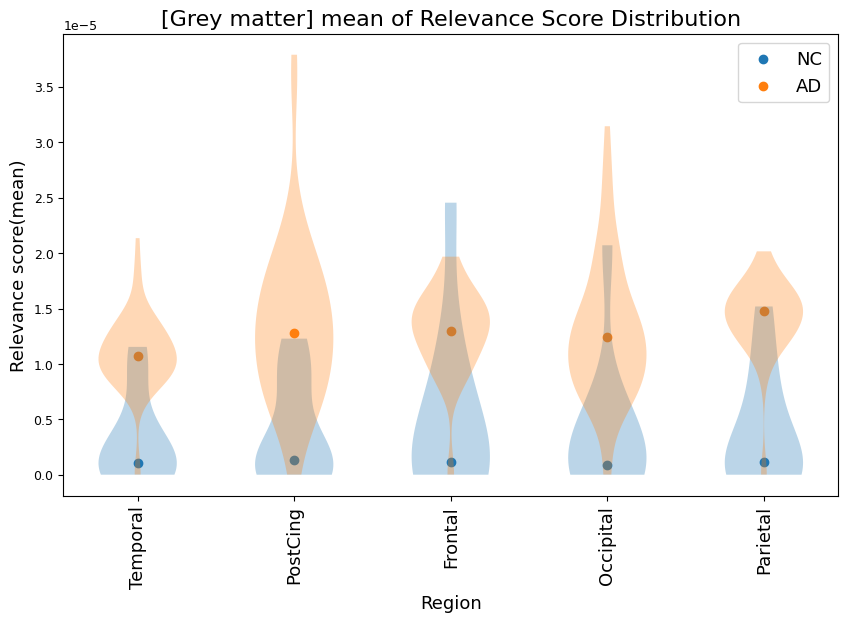

In [ ]:
fig, ax = plt.subplots()
label_list = ['NC', 'AD']
ax.scatter(lrp_columns, CN_mean_grey_all, label=label_list[0])
ax.scatter(lrp_columns, AD_mean_grey_all, label=label_list[1])
ax.violinplot(CN_df_grey_npy_all, positions = [0,1,2,3,4], showextrema=False)
ax.violinplot(AD_df_grey_npy_all, positions = [0,1,2,3,4], showextrema=False)
# ax.set_ylim(0, AD_maximum)
ax.set_title('[Grey matter] mean of Relevance Score Distribution', fontsize=16)
ax.set_xlabel('Region', fontsize=13)
ax.set_ylabel('Relevance score(mean)', fontsize=13)
ax.legend(fontsize=13)
for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(90)

plt.xticks(fontsize=13)
plt.show()

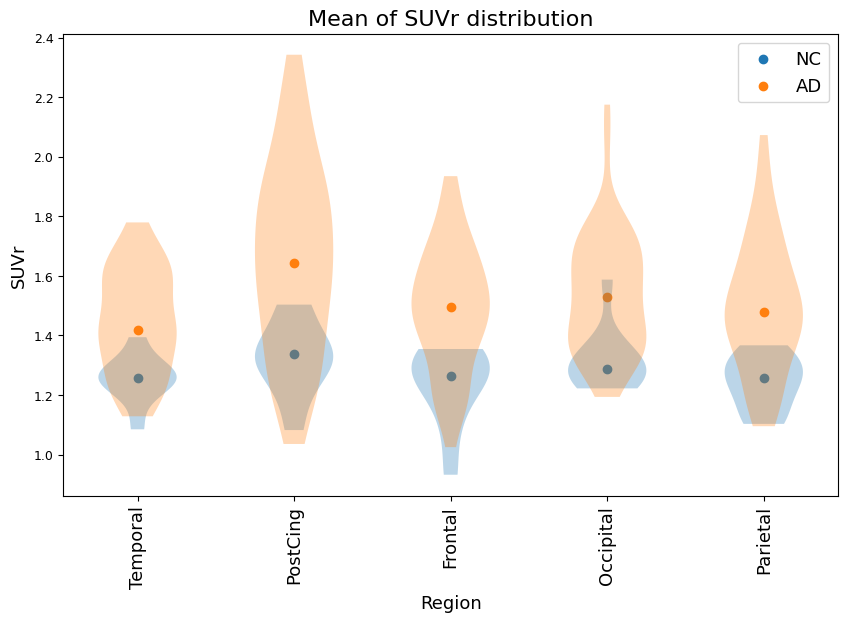

In [ ]:
fig, ax = plt.subplots()
label_list = ['NC', 'AD']
ax.scatter(suvr_columns, CN_suvr_mean_all, label=label_list[0])
ax.scatter(suvr_columns, AD_suvr_mean_all, label=label_list[1])
ax.violinplot(CN_suvr_npy_all, positions = [0,1,2,3,4], showextrema=False)
ax.violinplot(AD_suvr_npy_all, positions = [0,1,2,3,4], showextrema=False)
# ax.set_ylim(CN_suvr_minimum, AD_suvr_maximum)
ax.set_title('Mean of SUVr distribution', fontsize=16)
ax.set_xlabel('Region', fontsize=13)
ax.set_ylabel('SUVr', fontsize=13)
ax.legend(fontsize=13)
for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(90)
plt.xticks(fontsize=13)
plt.show()

In [ ]:
# 상관관계
"""
상관계수
"""
import sys
print(sys.version)

3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
